<h2>Introduction<h2>
<h3>This Machine learning Model predicts the CO(carbon dioxide)Emission using
<h3>1.Engine Size for a new car</h2>
<h3>2.Engine Size and No. of Cylinders for a new car</h2>

<h2>Objective 1:Predict the CO emission using engine size for a new car(Simple Linear Regression)</h2>
<h3>Simple Linear Regression model is a regression model that estimates the relationship between one independent variable and one dependent variable</h3>

<h2>Objective 2:Predict the CO emission using engine size and No.of cylinders for a new car(Multiple Linear Regression)</h2>
<h3>Multiple Linear Regression model is a regression model that estimates the relationship between more than one independent variable and one dependent variable</h3>

<h3>Acquire Data</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_excel('canadafuel.xlsx')
data

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,CO
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


<h3>Dataset description</h3>

In [2]:
data.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,CO
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   CO                639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.0+ KB


<h3>Data Prepocessing</h3>

In [4]:
data.isnull().sum()#here data has non-null count,if there are null values then replace with mean,mode values

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
CO                  0
dtype: int64

<h3>Data Visualization</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000052893AD7C8>,
      dtype=object)

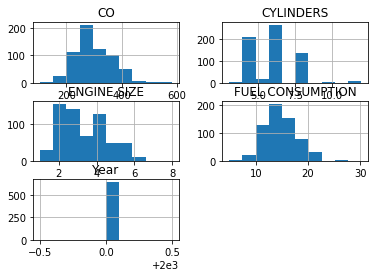

In [5]:
data.hist()

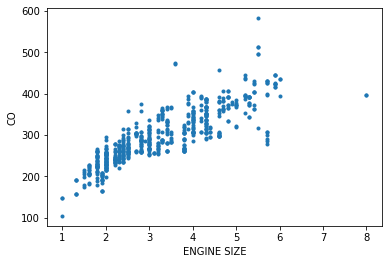

In [6]:
plt.scatter(data['ENGINE SIZE'],data['CO'],marker='.')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO')
plt.show()

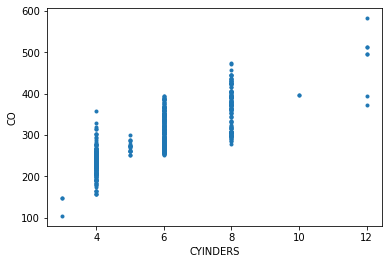

In [7]:
plt.scatter(data['CYLINDERS'],data['CO'],marker='.')
plt.xlabel('CYINDERS')
plt.ylabel('CO')
plt.show()

In [8]:
data.corr()['CO']#for seeing the correlation

Year                     NaN
ENGINE SIZE         0.849714
CYLINDERS           0.798447
FUEL CONSUMPTION    0.983232
CO                  1.000000
Name: CO, dtype: float64

<h3>Variable selection target variable</h3>
<h3>For Simple Linear Regression</h3>

In [5]:
X1=data[['ENGINE SIZE']]
y1=data['CO']

In [6]:
X1.head()

,ENGINE SIZE
0,1.6
1,1.6
2,3.2
3,3.5
4,1.8


In [7]:
y1.head()

0    216
1    205
2    265
3    301
4    230
Name: CO, dtype: int64

<h3>For Multiple Linear Regression</h3>

In [8]:
X2=data[['ENGINE SIZE','CYLINDERS']]
y2=data['CO']

In [9]:
X2.head()

,ENGINE SIZE,CYLINDERS
0,1.6,4
1,1.6,4
2,3.2,6
3,3.5,6
4,1.8,4


In [10]:
y2.head()

0    216
1    205
2    265
3    301
4    230
Name: CO, dtype: int64

<h3>Splitting of dataset into training set and testing set</h3>

In [11]:
from sklearn.model_selection import train_test_split

<h3>For Simple Linear Regresssion</h3>

In [12]:
#80% data is for training data set
#20% data is for Testing dataset
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=50)
print('shape of X train',X1_train.shape)
print('shape of y train',y1_train.shape)
print('shape of X test',X1_test.shape)
print('shape of y test',y1_test.shape)

shape of X train (511, 1)
shape of y train (511,)
shape of X test (128, 1)
shape of y test (128,)


<h3>Model Selection for simple linear</h3>

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model1=LinearRegression()
result1=model1.fit(X1_train,y1_train)

<h3>Model training and testing for single</h3>

In [18]:
prediction1 =result1.predict(X1_test)
prediction1

array([258.67033214, 365.59593806, 276.49126646, 285.40173362,
       414.60350743, 223.0284635 , 343.31977016, 396.78257311,
       338.86453658, 321.04360226, 298.76743436, 231.93893066,
       231.93893066, 307.67790152, 240.84939782, 249.75986498,
       285.40173362, 294.31220078, 231.93893066, 285.40173362,
       249.75986498, 263.12556572, 231.93893066, 254.21509856,
       374.50640521, 240.84939782, 258.67033214, 303.22266794,
       414.60350743, 236.39416424, 365.59593806, 356.6854709 ,
       258.67033214, 276.49126646, 209.66276276, 365.59593806,
       325.49883584, 303.22266794, 249.75986498, 249.75986498,
       298.76743436, 329.95406942, 223.0284635 , 249.75986498,
       240.84939782, 249.75986498, 321.04360226, 254.21509856,
       196.29706202, 361.14070448, 276.49126646, 321.04360226,
       343.31977016, 294.31220078, 303.22266794, 365.59593806,
       236.39416424, 289.8569672 , 231.93893066, 272.03603288,
       272.03603288, 508.16341261, 249.75986498, 338.86

<h3>Plot line for simple linear</h3>

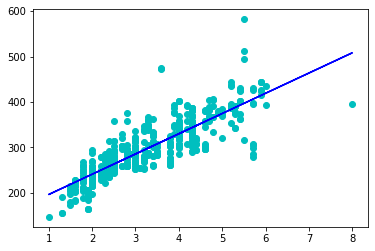

In [19]:
plt.scatter(X1_train,y1_train,color='c')
plt.plot(X1_test,prediction1,color='b')


<h2>Performance checking/Evaluation</h2>

<h3>For Simple Linear Regression</h3>

In [20]:
#using R squared method
from sklearn.metrics import r2_score
print("Accuracy of model using Simple Linear Regression",r2_score(y1_test,prediction1))

Accuracy of model using Simple Linear Regression 0.7577512810782833


<h3>Deployment of model(test on unknown data)</h3>

<h3>For Simple Linear Regression</h3>

In [30]:
print("check the CO emission of a car")
engine_size=float(input("Enter the engine size of your car\n"))
pred_new1=result1.predict([[engine_size]])
print(pred_new1)

check the CO emission of a car
Enter the engine size of your car
2.4
[258.67033214]


<h3>Spliting Dataset for Multiple</h3>

In [31]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size = 0.2,random_state = 50)
print('shape of X train',X2_train.shape)
print('shape of y train',y2_train.shape)
print('shape of X test',X2_test.shape)
print('shape of y test',y2_test.shape)

shape of X train (511, 2)
shape of y train (511,)
shape of X test (128, 2)
shape of y test (128,)


<h3>Model Selection for multiple</h3>

In [23]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()

<h3>Model Testing and Training<h3>

In [32]:
result2 = model2.fit(X2_train,y2_train)
result2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h3>Evaluation/Performance for multiple</h3>

In [33]:
prediction2 =result2.predict(X2_test)
prediction2

array([253.68960503, 367.90721267, 281.0116365 , 288.45832959,
       408.86402465, 223.90283268, 336.86183466, 418.82792906,
       333.13848811, 318.24510194, 299.62836922, 231.34952577,
       231.34952577, 307.07506231, 238.79621886, 246.24291195,
       288.45832959, 295.90502268, 231.34952577, 288.45832959,
       246.24291195, 257.41295158, 231.34952577, 249.96625849,
       375.35390576, 238.79621886, 259.90392768, 303.35171576,
       408.86402465, 235.07287231, 367.90721267, 360.46051958,
       259.90392768, 281.0116365 , 212.73279305, 367.90721267,
       334.39709377, 303.35171576, 246.24291195, 246.24291195,
       299.62836922, 325.69179503, 223.90283268, 246.24291195,
       238.79621886, 246.24291195, 318.24510194, 249.96625849,
       195.34843077, 364.18386612, 281.0116365 , 318.24510194,
       336.86183466, 295.90502268, 303.35171576, 367.90721267,
       235.07287231, 292.18167613, 231.34952577, 264.85964466,
       264.85964466, 499.48294736, 246.24291195, 345.56

In [34]:
from sklearn.metrics import r2_score
print("Accuracy of model using multiple linear regression",r2_score(y2_test,prediction2))

Accuracy of model using multiple linear regression 0.7718876705763088


In [35]:
print("check the CO emission of a car")
engine_size=float(input("Enter the engine size of your car\n"))
no_cylinders=int(input("Enter the number of cylinders\n"))
pred_new2=result2.predict([[engine_size,no_cylinders]])
print(pred_new2)

check the CO emission of a car
Enter the engine size of your car
2.4
Enter the number of cylinders
5
[259.90392768]


<h2>Conclusion</h2>

<h4>By comparing the accurancy performance of Single Linear Regreesion and Multiple Linear Regression,the Multiple Linear Regression has higher accuracy score.</h4>
<h4>So Multiple Linear Regression is best suitable for the given dataset</h4>